In [25]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read all files

In [26]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob("Cali_Files/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 251/251 [00:08<00:00, 28.46it/s]


View Calltree

In [27]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

5.257 main
├─ 0.041 MPI_Barrier
├─ 0.846 MPI_Comm_dup
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
├─ 0.048 MPI_Sendrecv
├─ 1.139 comm
│  └─ 1.139 comm_small
│     └─ 1.139 MPI_Scatter
├─ 1.384 comp
│  ├─ 0.087 comp_large
│  │  └─ 0.087 MPI_Gather
│  └─ 1.297 comp_small
├─ 0.767 correctness_check
└─ 1.059 data_init_runtime

Legend (Metric: Avg time/rank Min: 0.00 Max: 5.26 indices: {'profile': 4671953})
█ 4.73 - 5.26
█ 3.68 - 4.73
█ 2.63 - 3.68
█ 1.58 - 2.63
█ 0.53 - 1.58
█ 0.00 - 0.53

name User code    ◀  Only in left graph    ▶  Only in right graph



Group Performance data by `matrix_size` in the Thicket metadata table.

In [28]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("input_type")

tk.dataframe = tk.dataframe.reset_index().set_index(["node", "num_procs", "input_size", "input_type"]).sort_index()

tk.dataframe.head()

profile  \
node                                 num_procs input_size input_type                     
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed  3402180218   
                                                          Random            1996821894   
                                                          ReverseSorted     3176934874   
                                                          Sorted            2838900821   
                                               262144     1_perc_perturbed  3301644830   

                                                                            nid  \
node                                 num_procs input_size input_type              
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed  1.0   
                                                          Random            1.0   
                                                          ReverseSorted     1.0   
                                                          Sorted            1.0   
                                               262144     1_perc_perturbed  1.0   

                                                                             spot.channel  \
node                                 num_procs input_size input_type                        
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed  regionprofile   
                                                          Random            regionprofile   
                                                          ReverseSorted     regionprofile   
                                                          Sorted            regionprofile   
                                               262144     1_perc_perturbed  regionprofile   

                                                                            Min time/rank  \
node                                 num_procs input_size input_type                        
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed       0.336973   
                                                          Random                 0.346889   
                                                          ReverseSorted          0.322432   
                                                          Sorted                 0.339501   
                                               262144     1_perc_perturbed       0.426461   

                                                                            Max time/rank  \
node                                 num_procs input_size input_type                        
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed       0.338261   
                                                          Random                 0.347845   
                                                          ReverseSorted          0.323384   
                                                          Sorted                 0.341064   
                                               262144     1_perc_perturbed       0.426491   

                                                                            Avg time/rank  \
node                                 num_procs input_size input_type                        
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed       0.337617   
                                                          Random                 0.347367   
                                                          ReverseSorted          0.322908   
                                                          Sorted                 0.340283   
                                               262144     1_perc_perturbed       0.426476   

                                                                            Total time  \
node                                 num_procs input_size input_type                     
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed    

In [29]:
# Define common variables
processes = sorted(tk.metadata["num_procs"].unique())
input_sizes = sorted(tk.metadata["input_size"].unique())
input_types = sorted(tk.metadata["input_type"].unique())

In [23]:
# Change font size for all plots
plt.rcParams.update({"font.size": 20})

/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


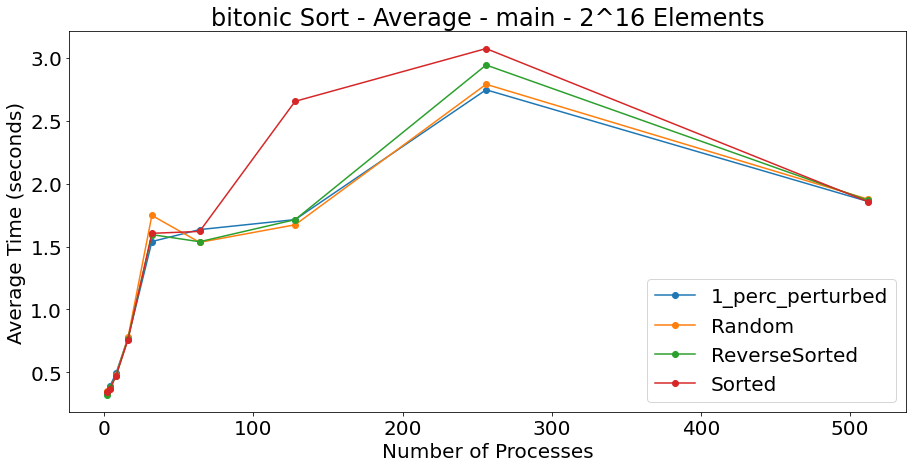

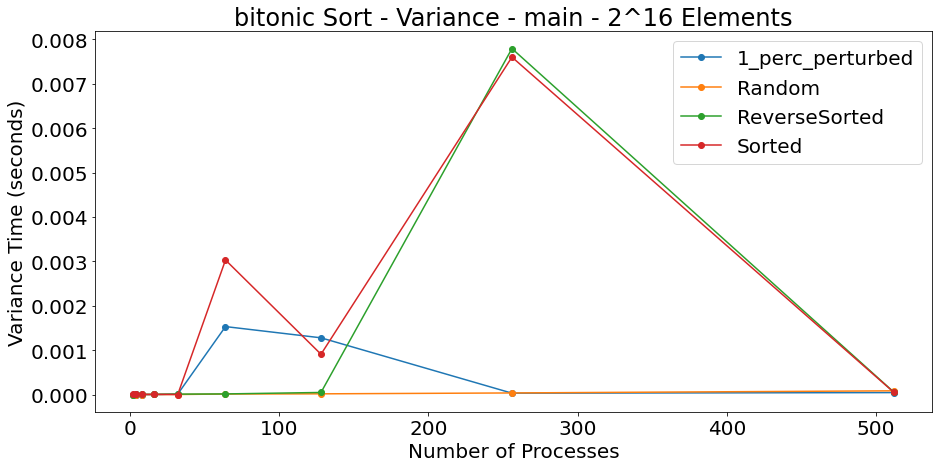

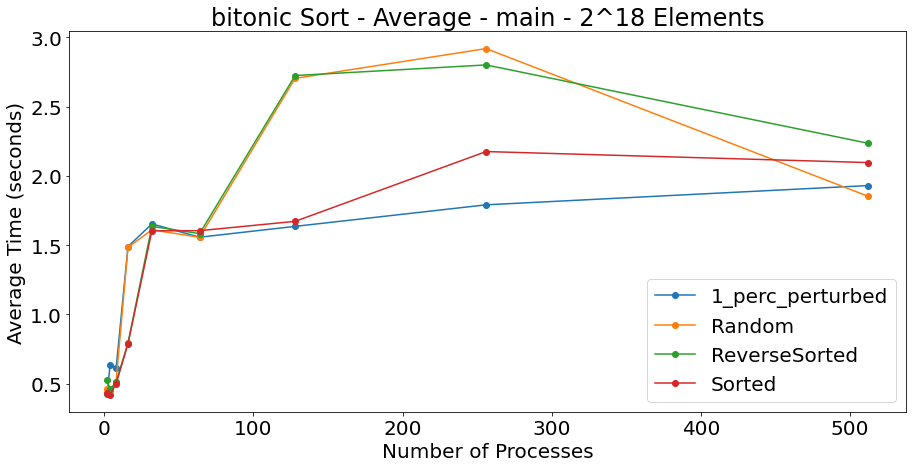

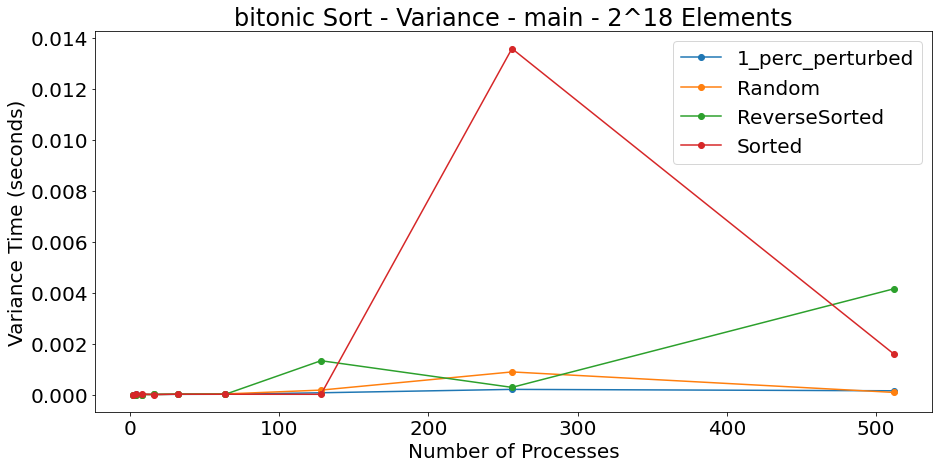

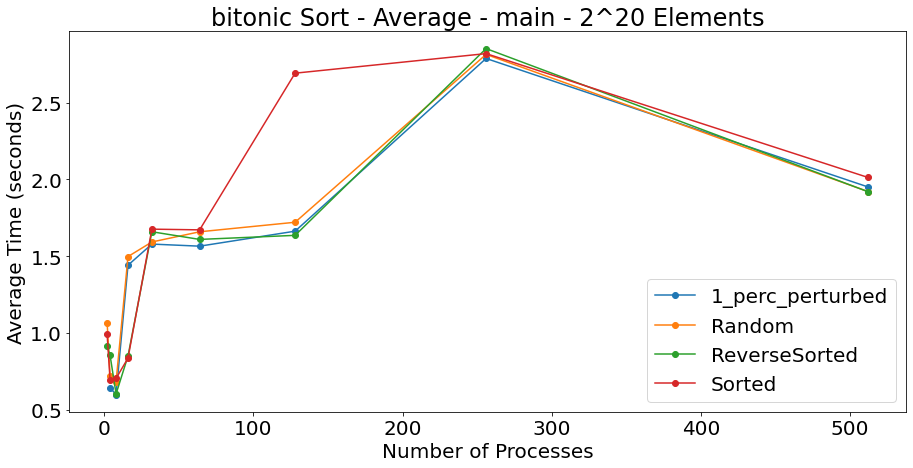

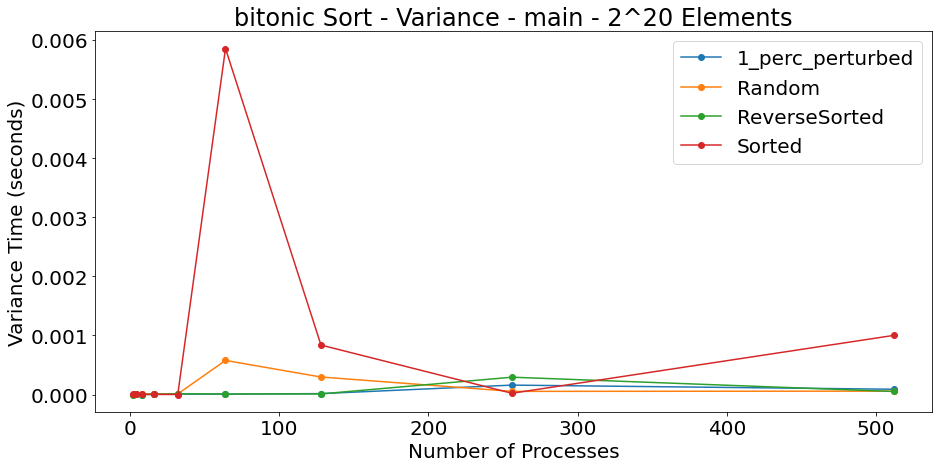

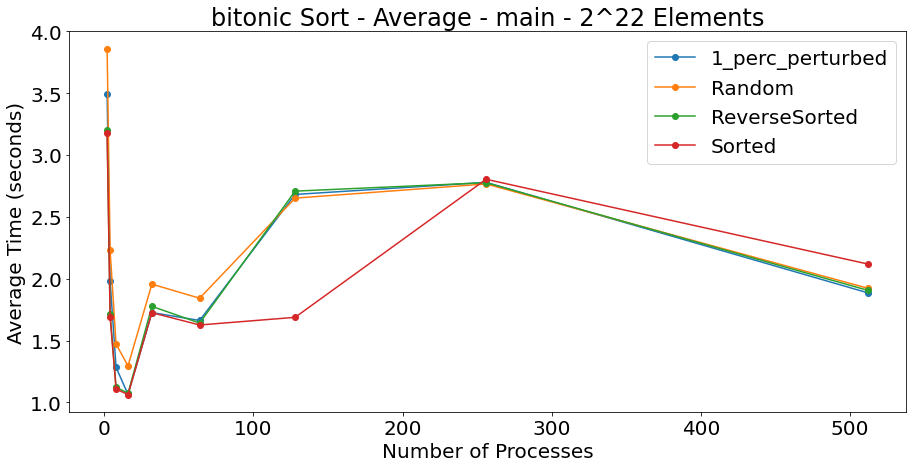

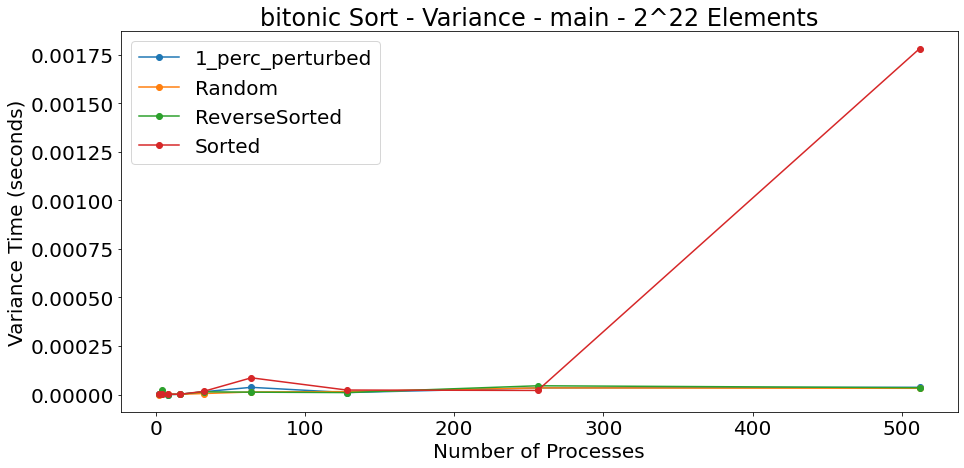

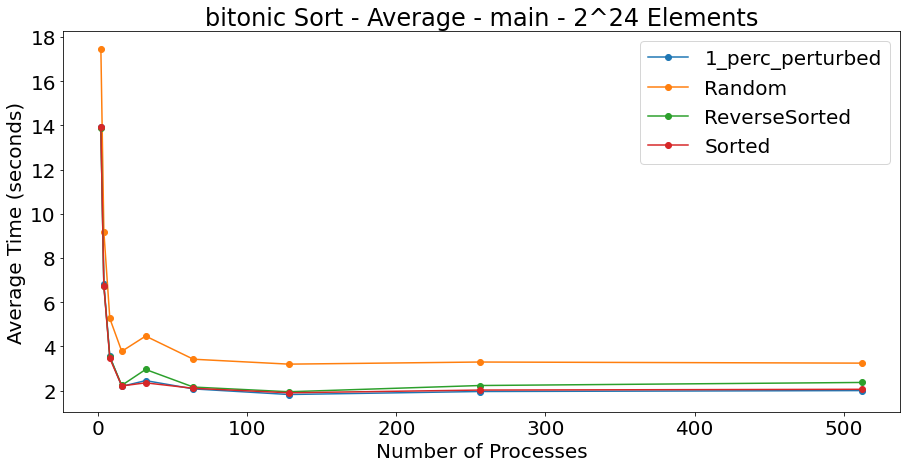

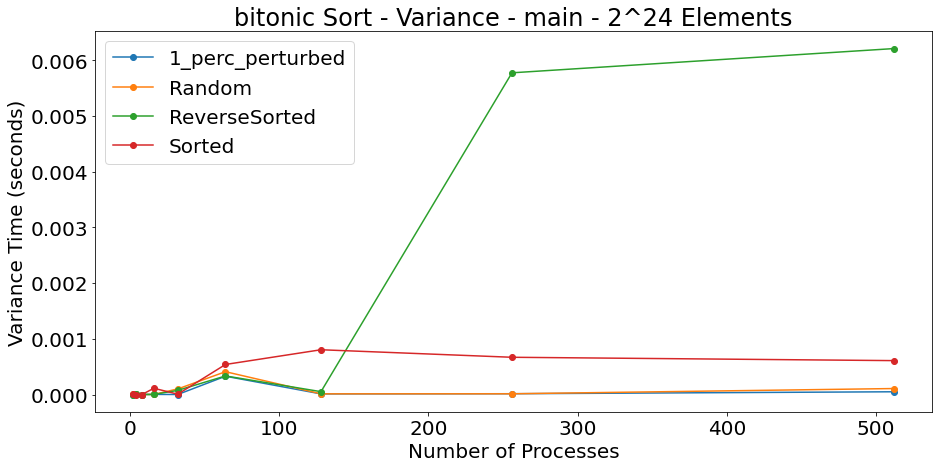

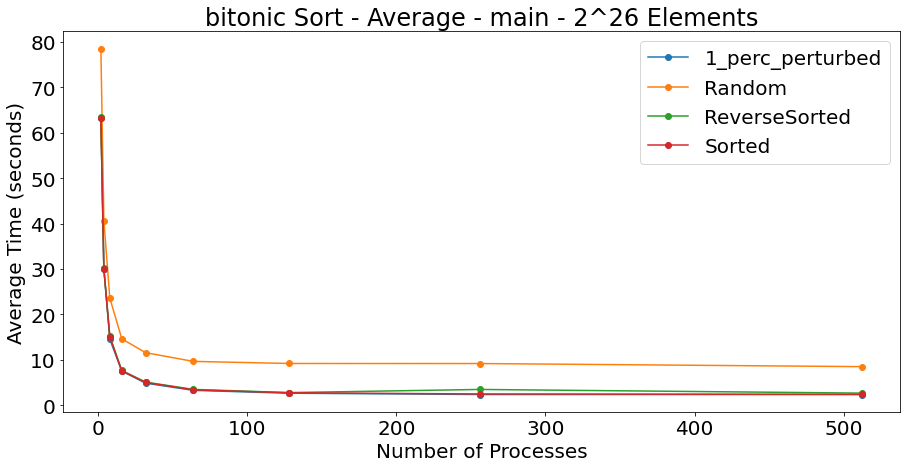

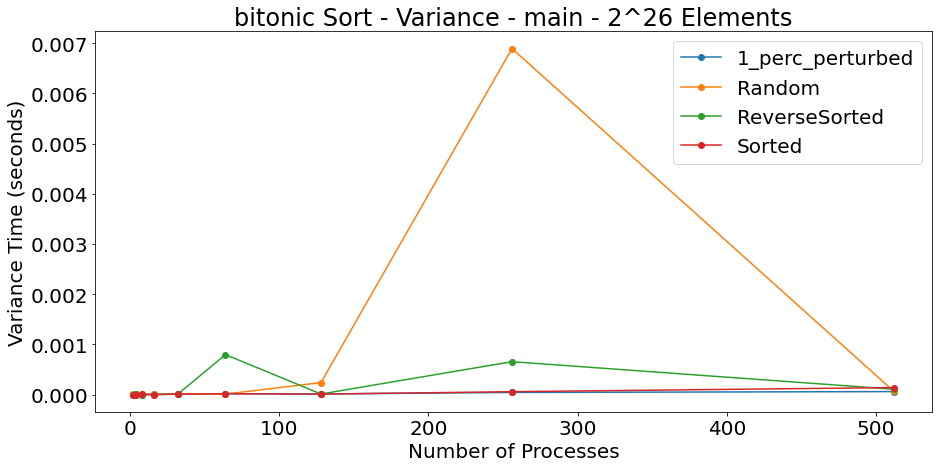

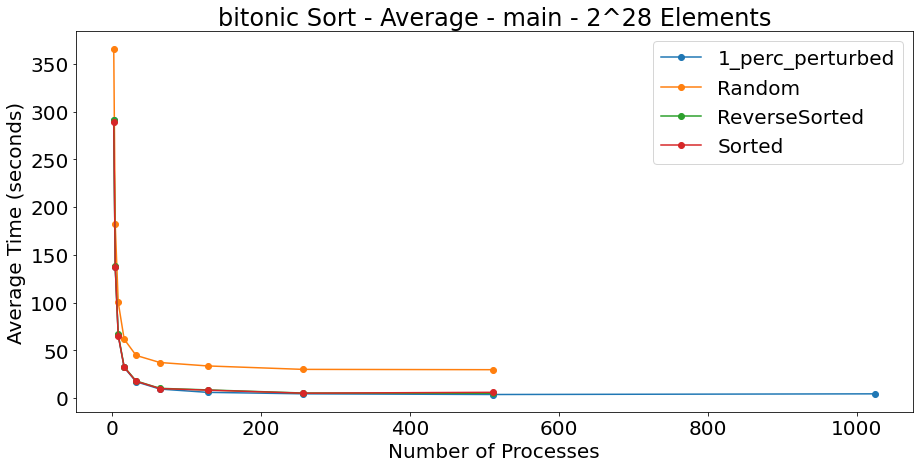

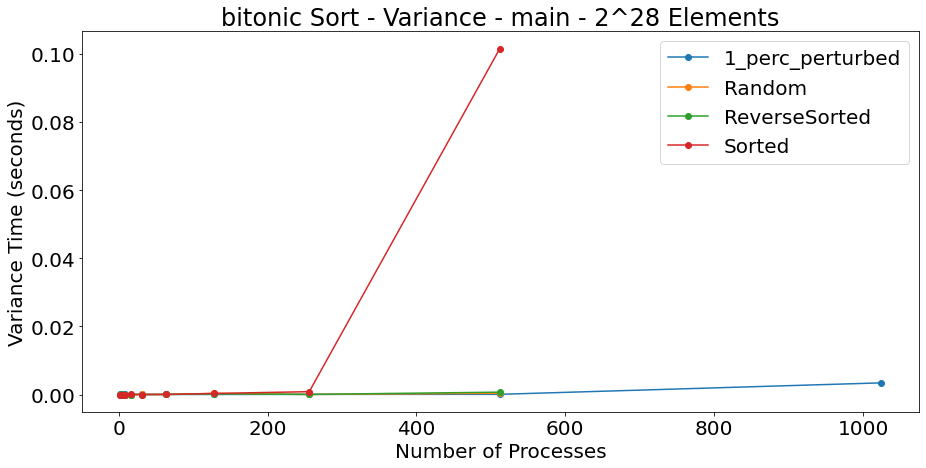

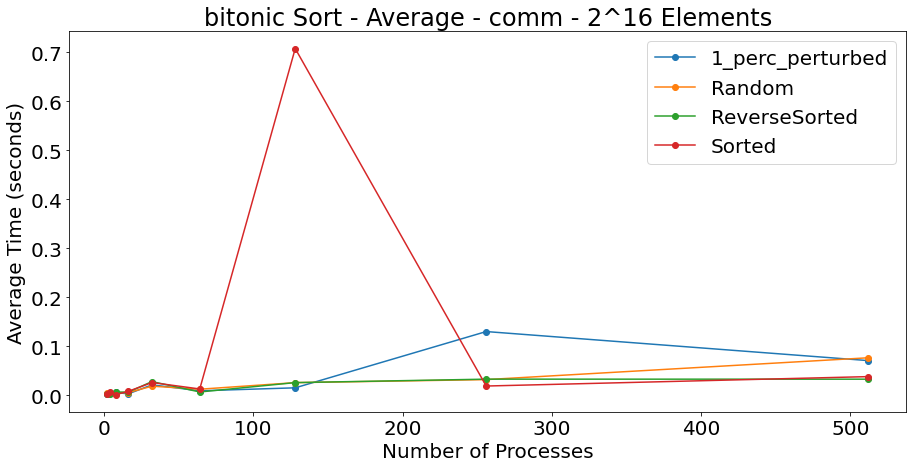

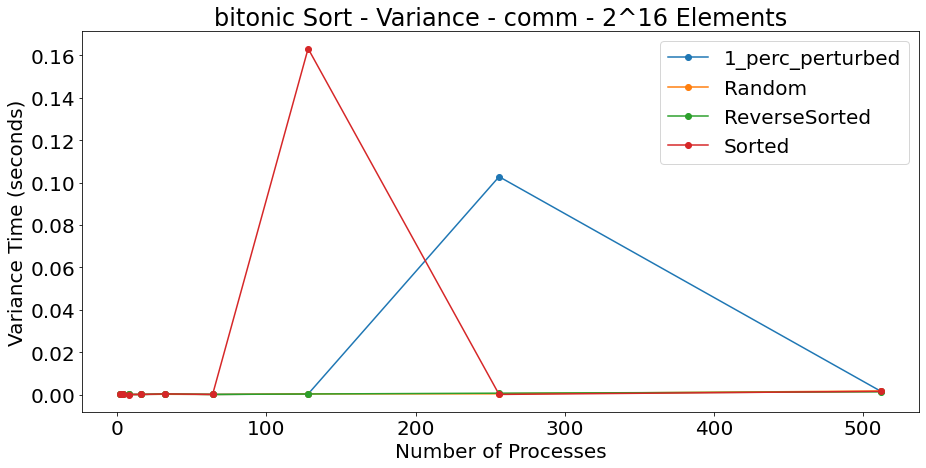

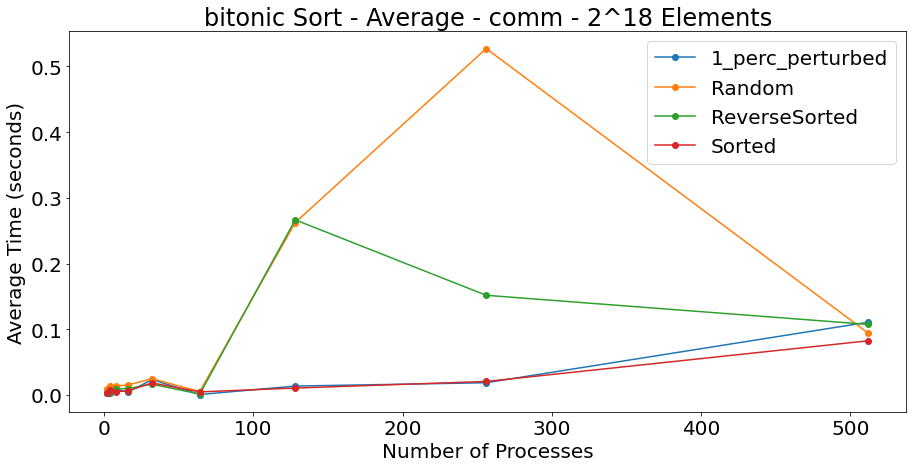

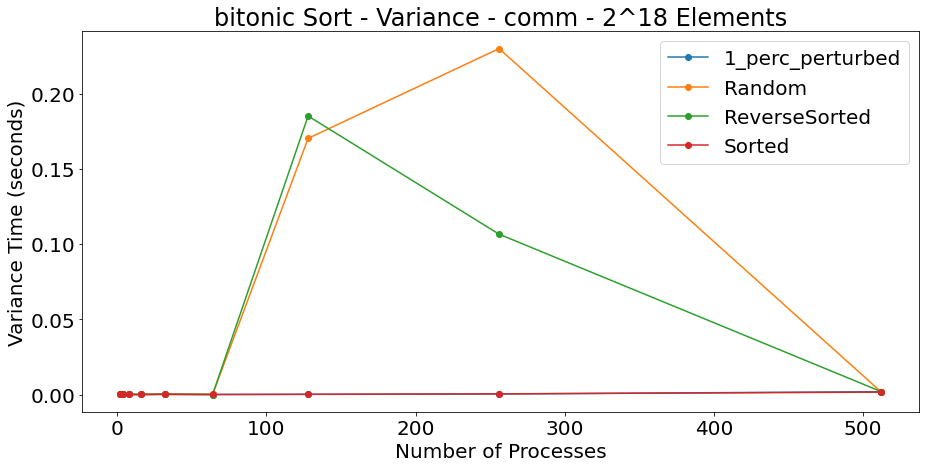

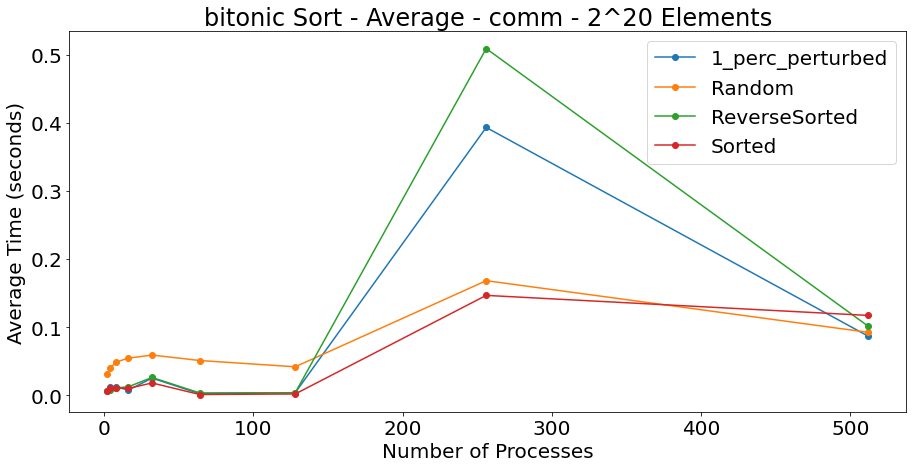

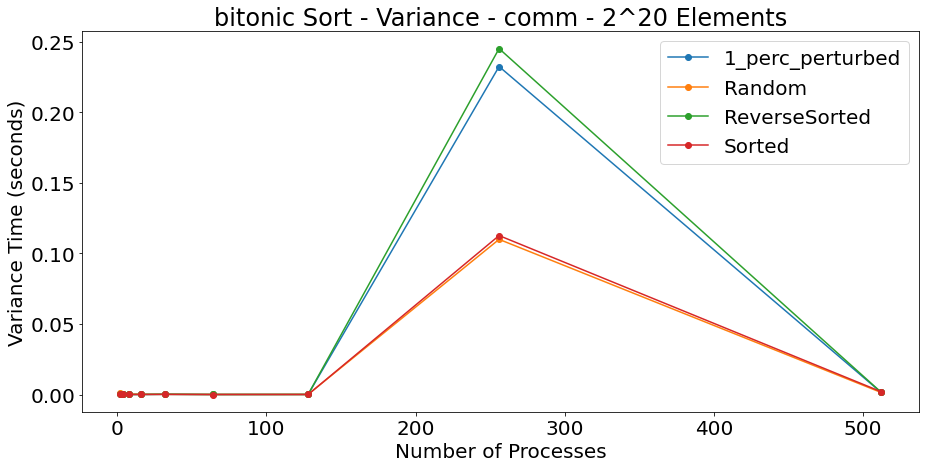

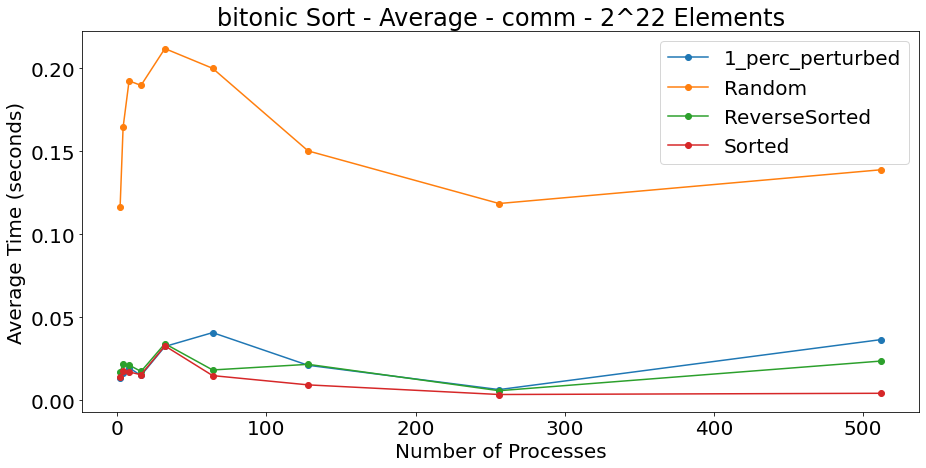

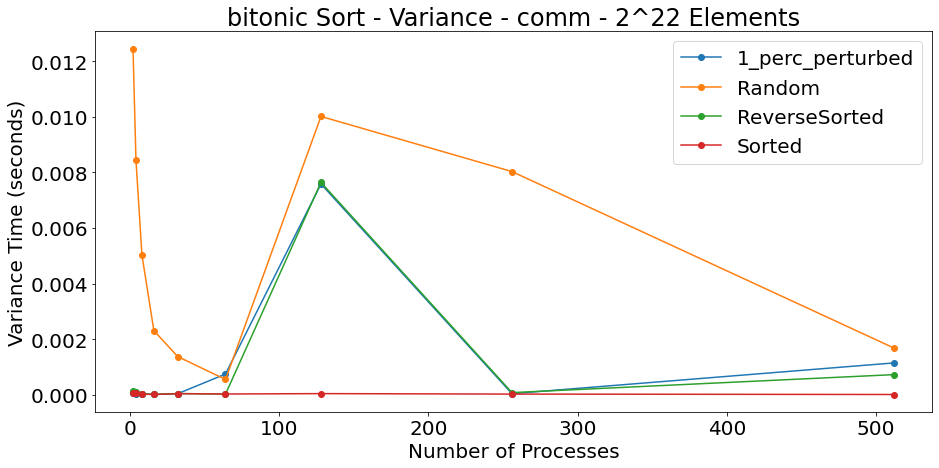

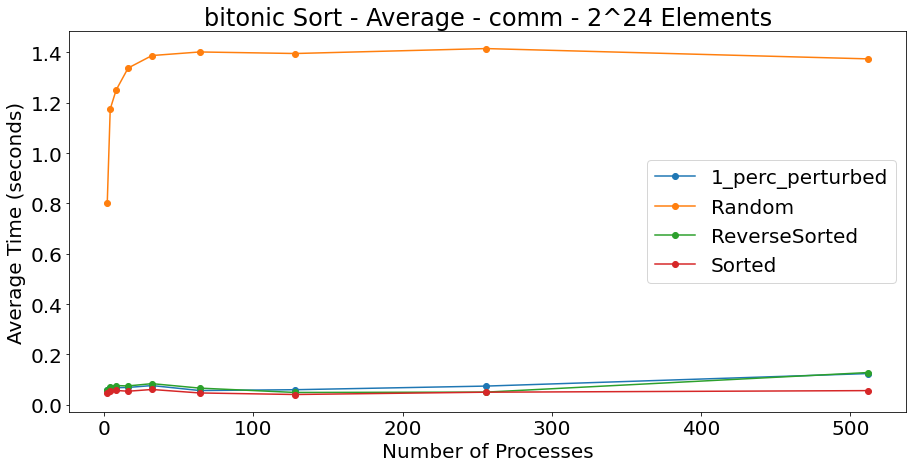

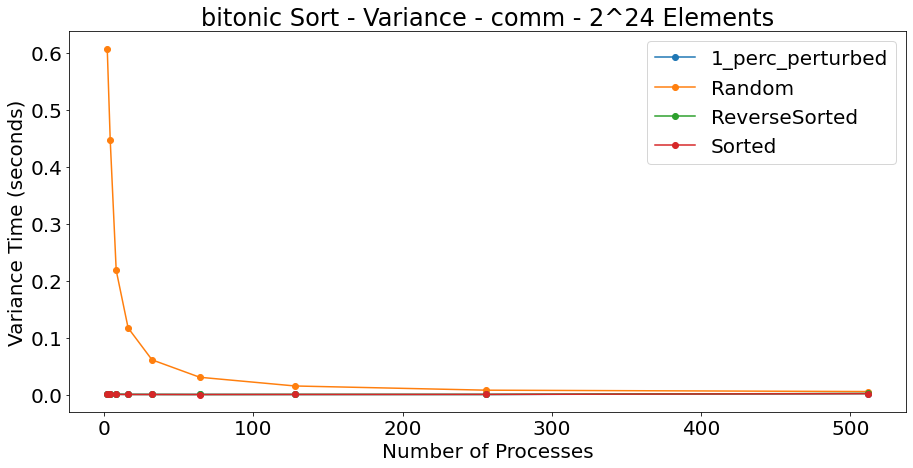

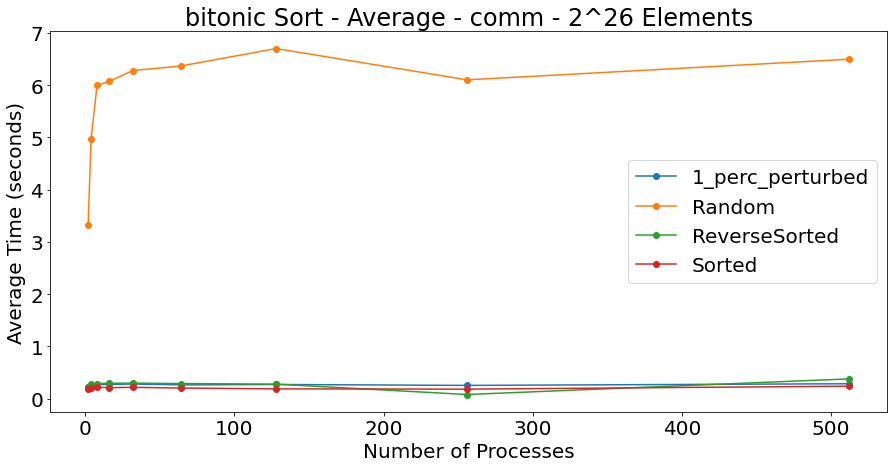

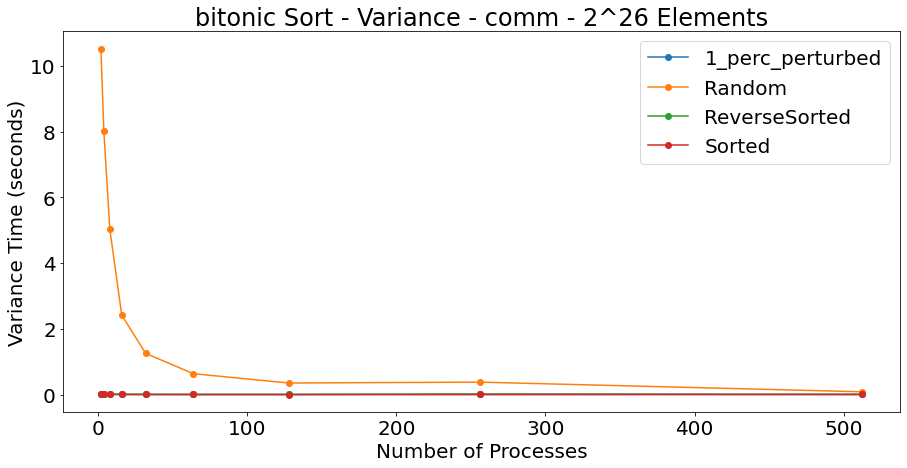

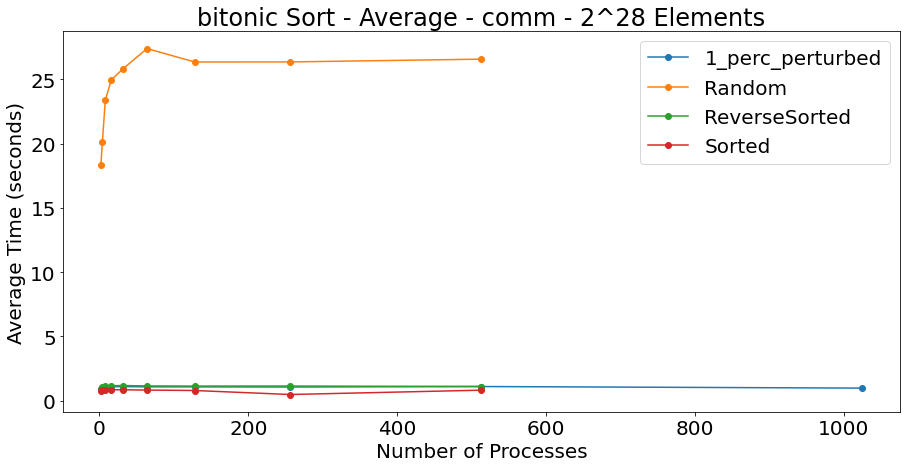

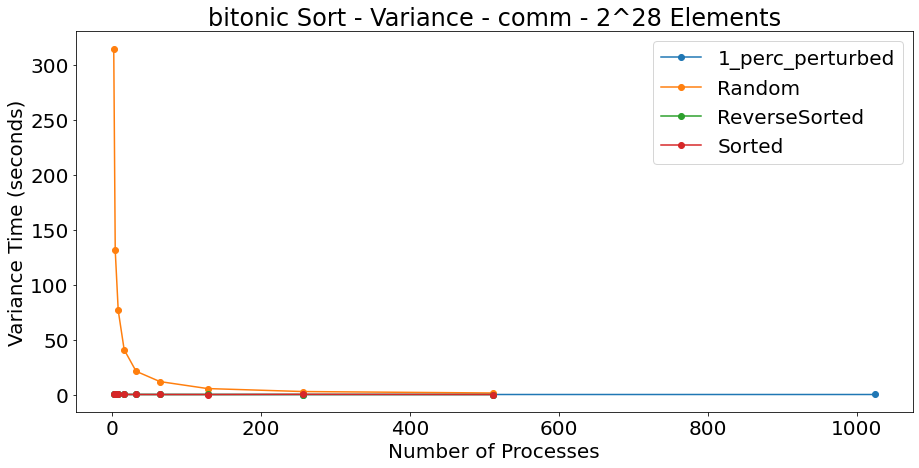

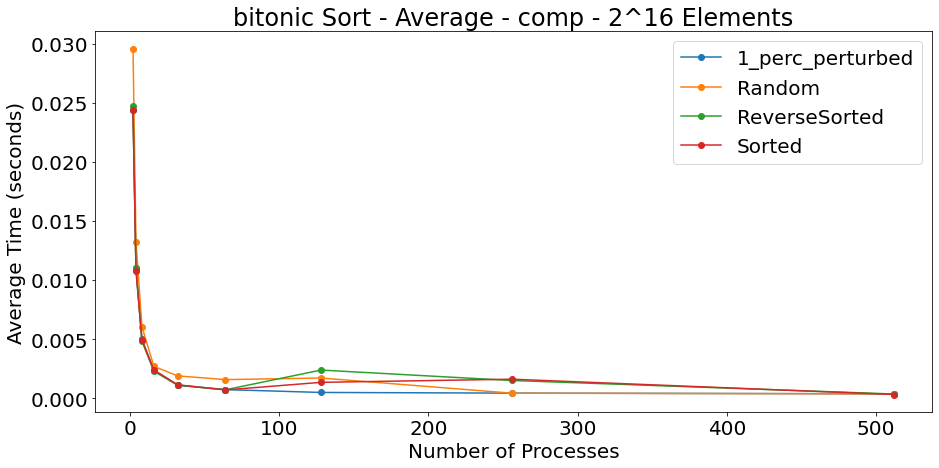

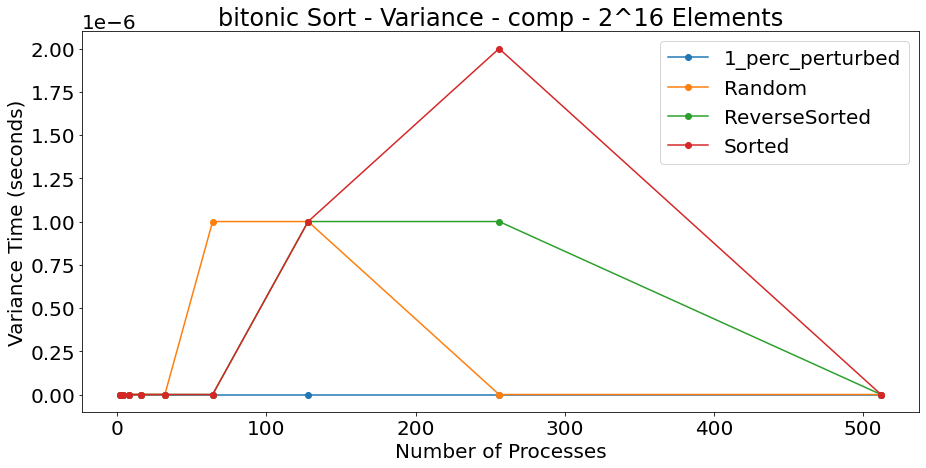

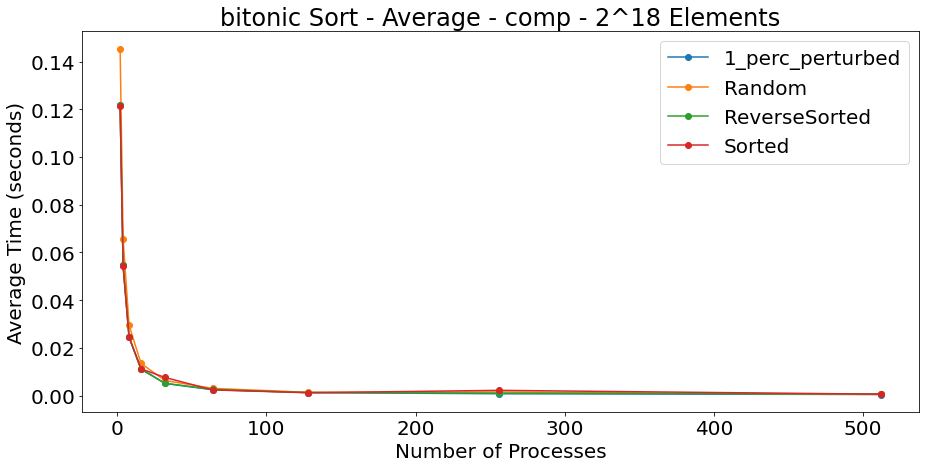

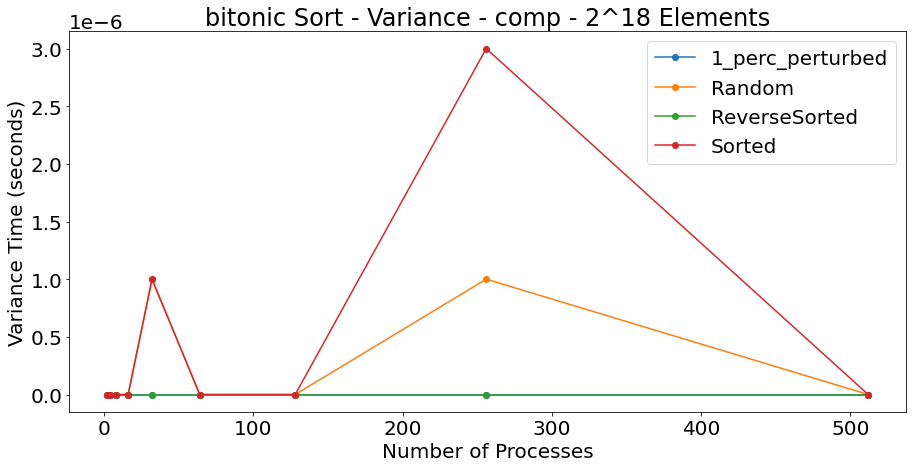

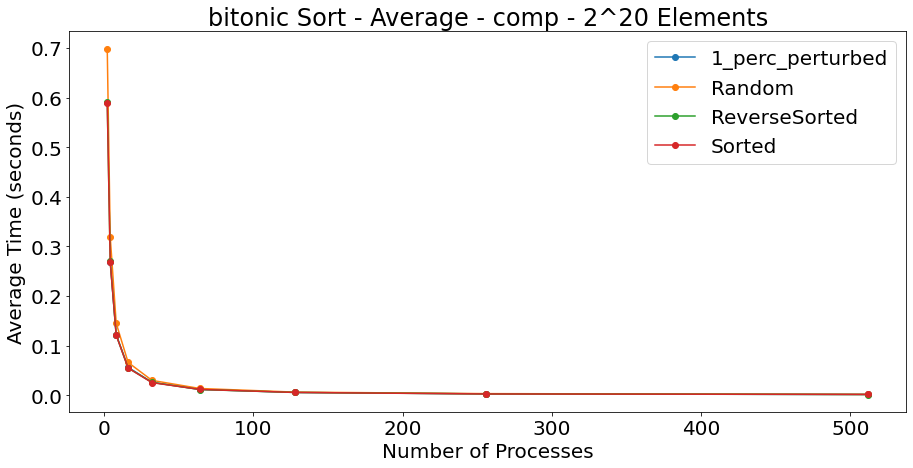

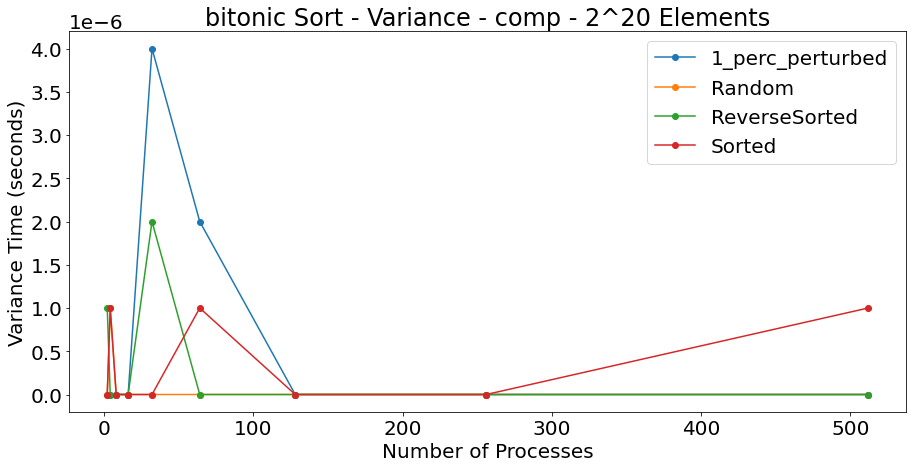

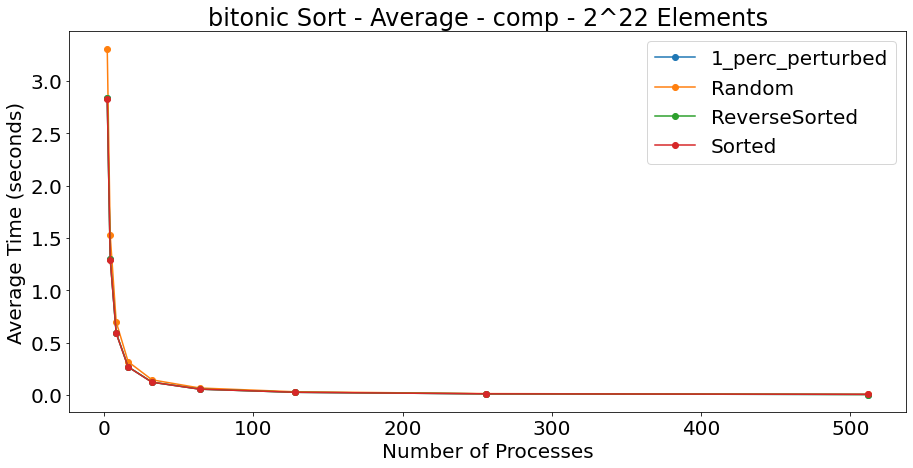

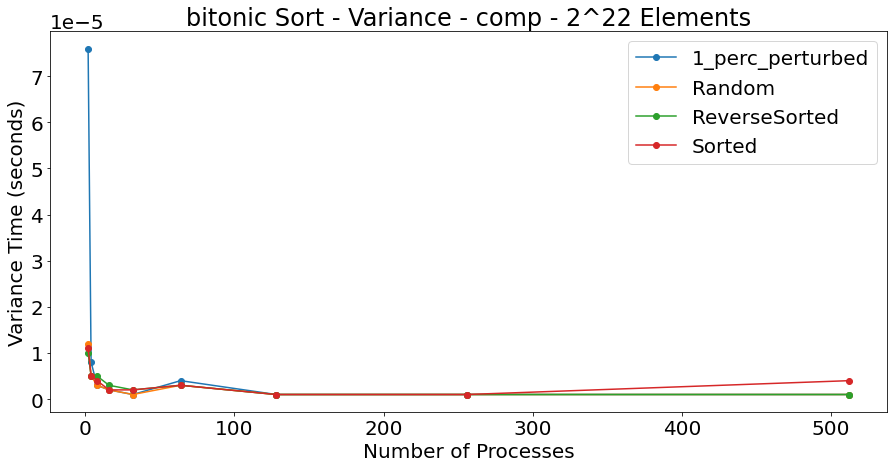

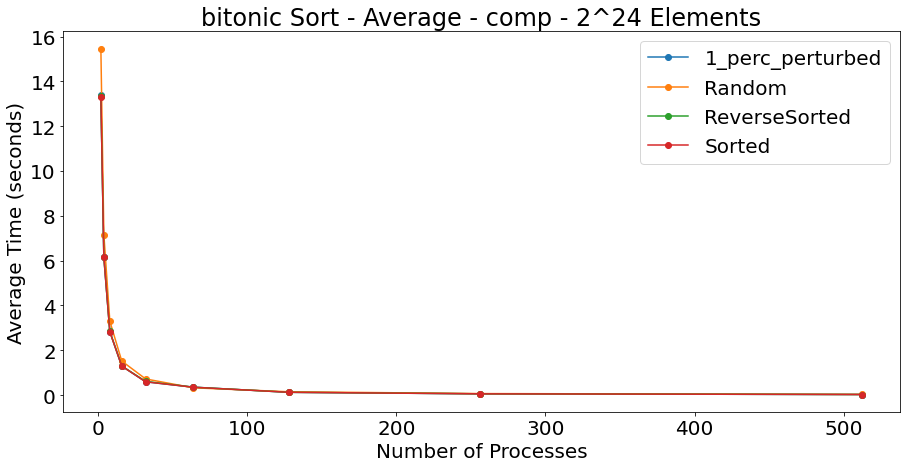

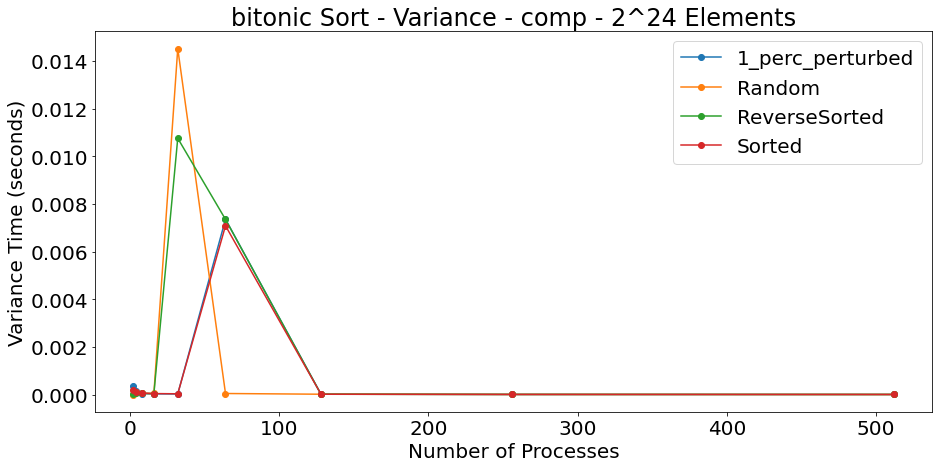

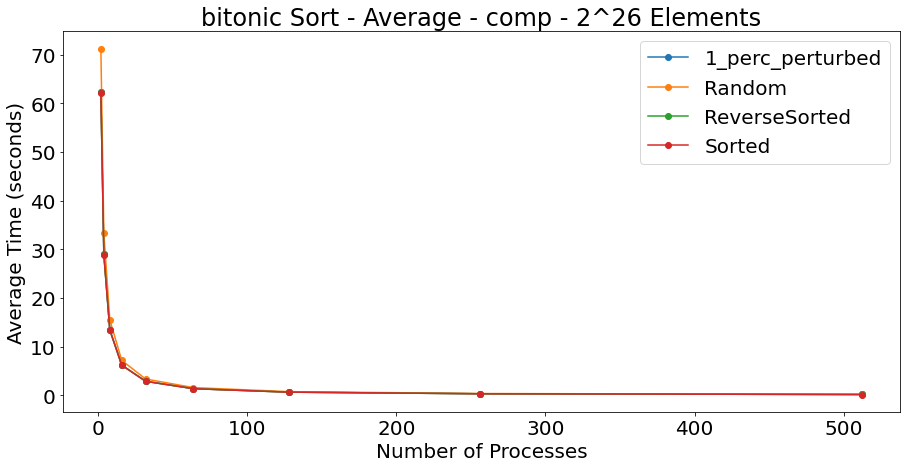

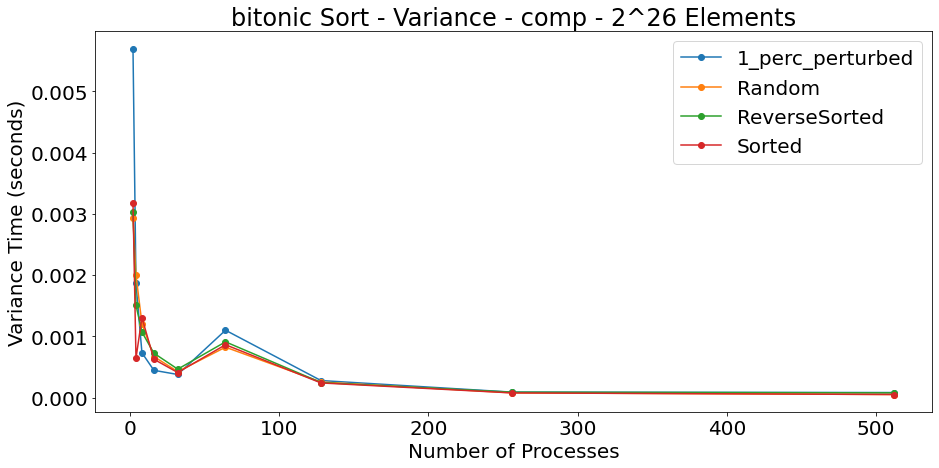

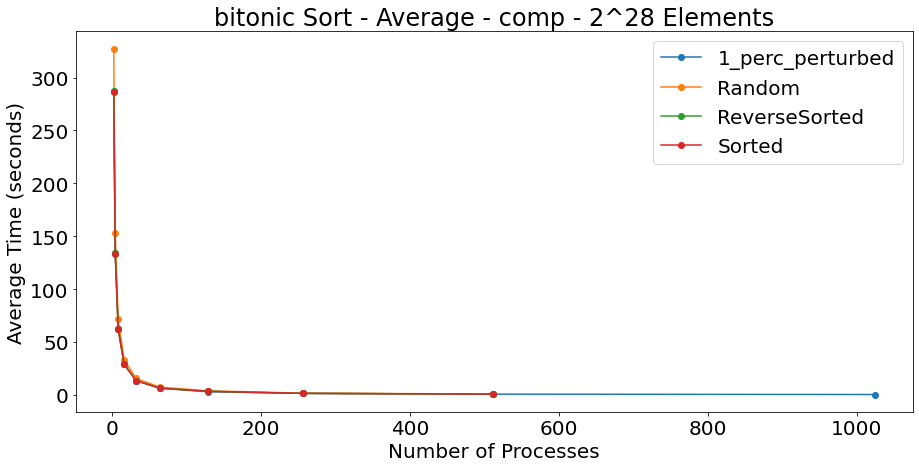

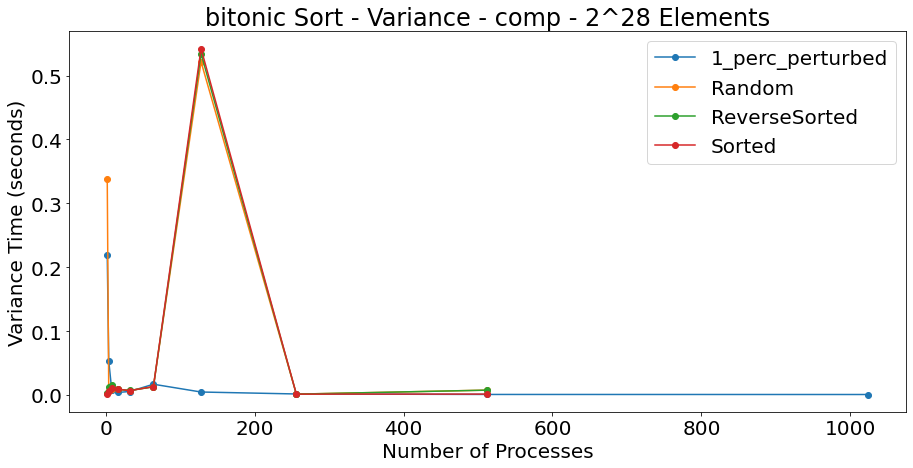

In [30]:
from math import log2

def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        figsize=(15,7)
    )
    return plot

important_names = ["comm", "comp" , "main"]

# Strong Scaling
for node in tk.graph.traverse():
    if node.frame["name"] not in important_names:
        continue

    node_df = tk.dataframe.loc[node, ["Min time/rank", "Max time/rank", "Avg time/rank", "Variance time/rank"]].unstack(level="input_size").unstack(level="input_type")
    for input_size in input_sizes:
        region_name = node.frame["name"]
        mat_df = node_df[[("Avg time/rank", input_size, input_types[0]), ("Avg time/rank", input_size, input_types[1]),
                          ("Avg time/rank", input_size, input_types[2]), ("Avg time/rank", input_size, input_types[3])]]
        mat_df.columns = input_types
        input_size_exp = int(log2(input_size))

        avg_plot = plot_pandas(
            df=mat_df,
            title=f"bitonic Sort - Average - {region_name} - 2^{input_size_exp} Elements",
            xlabel="Number of Processes",
            ylabel="Average Time (seconds)",
        )

        mat_df = node_df[[("Variance time/rank", input_size, input_types[0]), ("Variance time/rank", input_size, input_types[1]),
                          ("Variance time/rank", input_size, input_types[2]), ("Variance time/rank", input_size, input_types[3])]]
        mat_df.columns = input_types
        var_plot = plot_pandas(
            df=mat_df,
            title=f"bitonic Sort - Variance - {region_name} - 2^{input_size_exp} Elements",
            xlabel="Number of Processes",
            ylabel="Variance Time (seconds)",
        )

        avg_plot
        var_plot

        avg_fig = avg_plot.get_figure()
        avg_fig.savefig(f"Graphs/bitonic_Average_{region_name}_2^{input_size_exp}")
        var_fig = var_plot.get_figure()
        var_fig.savefig(f"Graphs/bitonic_Variance_{region_name}_2^{input_size_exp}")